In [16]:
from util import *

df = getPreProcessingDF('../preProcess.xlsx')

In [17]:
df['Category'].value_counts(normalize=True)

Category
People & Blogs           0.241491
Entertainment            0.196515
Gaming                   0.124392
Comedy                   0.077391
Sports                   0.072123
Music                    0.066045
Howto & Style            0.054295
News & Politics          0.051053
Film & Animation         0.036872
Education                0.036872
Science & Technology     0.023906
Pets & Animals           0.010535
Travel & Events          0.004862
Nonprofits & Activism    0.002026
Autos & Vehicles         0.001621
Name: proportion, dtype: float64

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15144\4202984858.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df, y='Category', palette='Set2', order=category_order, width=0.7)


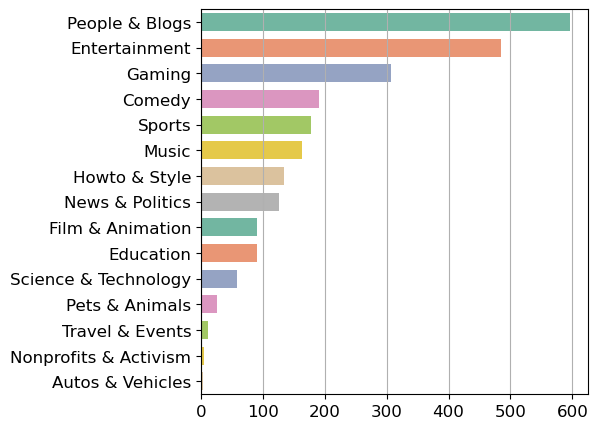

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

category_order = df['Category'].value_counts().index.tolist()
plt.subplots(figsize=(5, 5))

ax = sns.countplot(df, y='Category', palette='Set2', order=category_order, width=0.7)

plt.xticks(fontsize=12)

plt.grid(axis='x', linestyle='-')

plt.xlabel("")
plt.ylabel("")
plt.yticks(fontsize=12, color='black')
plt.xticks(fontsize=12, color='black')
plt.show()

# Compare Top-6 Category

In [19]:
pb = df[df['Category'] == 'People & Blogs']
enter = df[df['Category'] == 'Entertainment']
gaming = df[df['Category'] == 'Gaming']
comedy = df[df['Category'] == 'Comedy']
sports = df[df['Category'] == 'Sports']
music = df[df['Category'] == 'Music']

In [20]:
getStatistics(
    [
        "Abandonment",
        "DwellTimeRatio",
        "AbandonmentPointRatio",
        "Likert",
    ],
    People = pb,
    Entertainment = enter,
    Gaming = gaming,
    Comedy = comedy,
    Sports = sports,
    Music = music
)

+-----------------------+------------+-----------------+------------+------------+------------+------------+--------------+
| ---                   | People     | Entertainment   | Gaming     | Comedy     | Sports     | Music      | Statistics   |
|                       | (N=596)    | (N=485)         | (N=307)    | (N=191)    | (N=178)    | (N=163)    |              |
+=======================+============+=================+============+============+============+============+==============+
| Abandonment           | N=398      | N=344           | N=200      | N=96       | N=105      | N=102      | p=0.0000     |
|                       | 66.77852%  | 70.92784%       | 65.14658%  | 50.26178%  | 58.98876%  | 62.57669%  | stat=29.7258 |
+-----------------------+------------+-----------------+------------+------------+------------+------------+--------------+
| DwellTimeRatio        | M=56.400   | M=56.412        | M=58.316   | M=66.154   | M=58.604   | M=67.696   | p=0.0001     |
|       

## Compare Engagement Metrics
### Abandonment Rate

In [21]:
compareAbandonRate(
    People = pb,
    Entertainment = enter,
    Gaming = gaming,
    Comedy = comedy,
    Sports = sports,
    Music = music
)


Statistically significant difference found.
chi2 = 29.7258, p = 0.0000, dof = 5

Post-hoc results (Bonferroni-corrected p-values):
+---------------+-----------+-----------------+-----------+-----------+-----------+-----------+
|               |  People   |  Entertainment  |  Gaming   |  Comedy   |  Sports   |     Music |
|               |  (N=596)  |     (N=485)     |  (N=307)  |  (N=191)  |  (N=178)  |   (N=163) |
+===============+===========+=================+===========+===========+===========+===========+
|    People     |    nan    |        1        |     1     |  0.0009   |     1     |    1      |
|    (N=596)    |           |                 |           |           |           |           |
+---------------+-----------+-----------------+-----------+-----------+-----------+-----------+
| Entertainment |     1     |       nan       |     1     |     0     |   0.072   |    0.8741 |
|    (N=485)    |           |                 |           |           |           |           |
+---

### Dwell Time

In [22]:
kruskalTest('DwellTimeRatio',     
    People = pb,
    Entertainment = enter,
    Gaming = gaming,
    Comedy = comedy,
    Sports = sports,
    Music = music
    )

Statistically significant difference found.
H = 25.8825, p = 0.0001
+---------------+----------+-----------------+----------+----------+----------+---------+
|               |   People |   Entertainment |   Gaming |   Comedy |   Sports |   Music |
+===============+==========+=================+==========+==========+==========+=========+
| People        |   1      |          1      |   0.5864 |   0.0024 |   0.7822 |  0.002  |
+---------------+----------+-----------------+----------+----------+----------+---------+
| Entertainment |   1      |          1      |   1      |   0.039  |   1      |  0.0291 |
+---------------+----------+-----------------+----------+----------+----------+---------+
| Gaming        |   0.5864 |          1      |   1      |   0.9971 |   1      |  0.7059 |
+---------------+----------+-----------------+----------+----------+----------+---------+
| Comedy        |   0.0024 |          0.039  |   0.9971 |   1      |   1      |  1      |
+---------------+----------+----

c:\Users\KHU\Desktop\Research\Youtube\Data\Analysis\util.py:166: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dunn_result = dunn_result.applymap(


### Abandonment Point

In [23]:
kruskalTest('AbandonmentPointRatio',     
    People = pb,
    Entertainment = enter,
    Gaming = gaming,
    Comedy = comedy,
    Sports = sports,
    Music = music
    )

Statistically significant difference found.
H = 14.3053, p = 0.0138
+---------------+----------+-----------------+----------+----------+----------+---------+
|               |   People |   Entertainment |   Gaming |   Comedy |   Sports |   Music |
+===============+==========+=================+==========+==========+==========+=========+
| People        |   1      |          1      |   1      |   0.0179 |   0.5589 |  1      |
+---------------+----------+-----------------+----------+----------+----------+---------+
| Entertainment |   1      |          1      |   1      |   0.0346 |   0.8108 |  1      |
+---------------+----------+-----------------+----------+----------+----------+---------+
| Gaming        |   1      |          1      |   1      |   0.2598 |   1      |  1      |
+---------------+----------+-----------------+----------+----------+----------+---------+
| Comedy        |   0.0179 |          0.0346 |   0.2598 |   1      |   1      |  0.5337 |
+---------------+----------+----

c:\Users\KHU\Desktop\Research\Youtube\Data\Analysis\util.py:166: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dunn_result = dunn_result.applymap(


### Likert

In [24]:
kruskalTest('Likert',     
    People = pb,
    Entertainment = enter,
    Gaming = gaming,
    Comedy = comedy,
    Sports = sports,
    Music = music
    )

Statistically significant difference found.
H = 11.3528, p = 0.0448
+---------------+----------+-----------------+----------+----------+----------+---------+
|               |   People |   Entertainment |   Gaming |   Comedy |   Sports |   Music |
+===============+==========+=================+==========+==========+==========+=========+
| People        |   1      |               1 |        1 |        1 |   0.2255 |  0.0724 |
+---------------+----------+-----------------+----------+----------+----------+---------+
| Entertainment |   1      |               1 |        1 |        1 |   1      |  1      |
+---------------+----------+-----------------+----------+----------+----------+---------+
| Gaming        |   1      |               1 |        1 |        1 |   1      |  1      |
+---------------+----------+-----------------+----------+----------+----------+---------+
| Comedy        |   1      |               1 |        1 |        1 |   1      |  1      |
+---------------+----------+----

c:\Users\KHU\Desktop\Research\Youtube\Data\Analysis\util.py:166: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dunn_result = dunn_result.applymap(


## Compare Skipping Behaviors Rate

### Skip Type

#### 10-Seconds Using Rate

In [25]:
compareSkipRate('Kind_Second', pb, enter, gaming, comedy, sports, music)

Proportion of 'second' usage by category:
--------------------------------------------------
Category          Count / Total   =  Ratio (%)
People              119 / 596     =     19.97%
Entertainment       109 / 485     =     22.47%
Gaming               99 / 307     =     32.25%
Comedy               34 / 191     =     17.80%
Sports               51 / 178     =     28.65%
Music                19 / 163     =     11.66%

Statistically significant difference found.
chi2 = 36.2516, p = 0.0000, dof = 5

Post-hoc results (Bonferroni-corrected p-values):
+---------------+-----------+-----------------+-----------+-----------+-----------+-----------+
|               |  People   |  Entertainment  |  Gaming   |  Comedy   |  Sports   | Music     |
|               |  (N=596)  |     (N=485)     |  (N=307)  |  (N=191)  |  (N=178)  | (N=163)   |
+===============+===========+=================+===========+===========+===========+===========+
|    People     |           |     1.0000      |  0.0009   |  1

#### Scurbbing Using Rate

In [26]:
compareSkipRate('Kind_Scrubbing', pb, enter, gaming, comedy, sports, music)

Proportion of 'scrubbing' usage by category:
--------------------------------------------------
Category          Count / Total   =  Ratio (%)
People               43 / 596     =      7.21%
Entertainment        39 / 485     =      8.04%
Gaming               10 / 307     =      3.26%
Comedy               10 / 191     =      5.24%
Sports                5 / 178     =      2.81%
Music                 5 / 163     =      3.07%

Statistically significant difference found.
chi2 = 15.4416, p = 0.0086, dof = 5

Post-hoc results (Bonferroni-corrected p-values):
+---------------+-----------+-----------------+-----------+-----------+-----------+-----------+
|               |  People   |  Entertainment  |  Gaming   |  Comedy   |  Sports   | Music     |
|               |  (N=596)  |     (N=485)     |  (N=307)  |  (N=191)  |  (N=178)  | (N=163)   |
+===============+===========+=================+===========+===========+===========+===========+
|    People     |           |     1.0000      |  0.3694   |

### Skip Direction

#### Forward Skip Using Rate

In [27]:
compareSkipRate('Dist_Forward', pb, enter, gaming, comedy, sports, music)

Proportion of 'forward' usage by category:
--------------------------------------------------
Category          Count / Total   =  Ratio (%)
People              117 / 596     =     19.63%
Entertainment       125 / 485     =     25.77%
Gaming               74 / 307     =     24.10%
Comedy               35 / 191     =     18.32%
Sports               45 / 178     =     25.28%
Music                18 / 163     =     11.04%

Statistically significant difference found.
chi2 = 20.8758, p = 0.0009, dof = 5

Post-hoc results (Bonferroni-corrected p-values):
+---------------+-----------+-----------------+-----------+-----------+-----------+-----------+
|               |  People   |  Entertainment  |  Gaming   |  Comedy   |  Sports   | Music     |
|               |  (N=596)  |     (N=485)     |  (N=307)  |  (N=191)  |  (N=178)  | (N=163)   |
+===============+===========+=================+===========+===========+===========+===========+
|    People     |           |     0.2922      |  1.0000   |  

#### Backward Skip Using Rate

In [28]:
compareSkipRate('Dist_Backward', pb, enter, gaming, comedy, sports, music)

Proportion of 'backward' usage by category:
--------------------------------------------------
Category          Count / Total   =  Ratio (%)
People               21 / 596     =      3.52%
Entertainment        18 / 485     =      3.71%
Gaming               21 / 307     =      6.84%
Comedy                4 / 191     =      2.09%
Sports                2 / 178     =      1.12%
Music                 3 / 163     =      1.84%

Statistically significant difference found.
chi2 = 15.1886, p = 0.0096, dof = 5

Post-hoc results (Bonferroni-corrected p-values):
+---------------+-----------+-----------------+-----------+-----------+-----------+-----------+
|               |  People   |  Entertainment  |  Gaming   |  Comedy   |  Sports   | Music     |
|               |  (N=596)  |     (N=485)     |  (N=307)  |  (N=191)  |  (N=178)  | (N=163)   |
+===============+===========+=================+===========+===========+===========+===========+
|    People     |           |     1.0000      |  0.5695   | 

## Compare Speed Adjustement Rate

In [29]:
df_list = [
    ("People", pb),
    ("Entertainment", enter),
    ("Gaming", gaming),
    ("Comedy", comedy),
    ("Sports", sports),
    ("Music", music),
]

new_df = pd.concat(
    [
        pd.DataFrame({"kind": name, "IsAdjustedSpeed": df["Speed"]})
        for name, df in df_list
    ],
    ignore_index=True,
)

new_df["kind"] = pd.Categorical(new_df["kind"], ordered=True)

In [30]:
from scipy import stats
from statsmodels.stats.multitest import multipletests
from itertools import combinations
from tabulate import tabulate

contingency_df = pd.crosstab(new_df["kind"], new_df["IsAdjustedSpeed"])
contingency = contingency_df.values

# Save Samples Count
sample_sizes = {kind: total for kind, total in contingency_df.sum(axis=1).items()}

chi2, p, dof, expected = stats.chi2_contingency(contingency)

# Order by Samples Count
sorted_kinds = sorted(sample_sizes.items(), key=lambda x: x[1], reverse=True)

print("Adjusted Speed")
print("-" * 60)
print(f"{'Kind':<15} {'True':>8} / {'Total':<7} = {'True ratio (%)':>10}")
for kind, total in sorted_kinds:
    t_count = contingency_df.loc[kind, True] if True in contingency_df.columns else 0
    ratio = (t_count / total) * 100 if total > 0 else 0
    print(f"{kind:<15} {t_count:>8} / {total:<7} = {ratio:>9.2f}%")

if p >= 0.05:
    print(
        f"\nNo statistically significant difference.\nChi2 = {chi2:.4f}, p = {p:.4f}, dof = {dof}"
    )
else:
    print(
        f"\nStatistically significant difference found.\nChi2 = {chi2:.4f}, p = {p:.4f}, dof = {dof}"
    )

    # Post-hoc
    groups = list(contingency_df.index)
    group_combinations = list(combinations(groups, 2))
    p_values = []

    for g1, g2 in group_combinations:
        sub_table = contingency_df.loc[[g1, g2]].values
        chi2_sub, p_val, _, _ = stats.chi2_contingency(sub_table)
        p_values.append(p_val)

    # Bonferroni correction
    _, corrected_pvals, _, _ = multipletests(p_values, alpha=0.05, method="bonferroni")

    p_matrix = pd.DataFrame(index=groups, columns=groups, dtype="object")
    for idx, (g1, g2) in enumerate(group_combinations):
        adj_p = corrected_pvals[idx]
        formatted = f"\033[91m{adj_p:.4f}\033[0m" if adj_p <= 0.05 else f"{adj_p:.4f}"
        p_matrix.loc[g1, g2] = formatted
        p_matrix.loc[g2, g1] = formatted

    for g in groups:
        p_matrix.loc[g, g] = ""

    formatted_index = [f"{g}\n(N={sample_sizes[g]})" for g in groups]
    p_matrix.index = formatted_index
    p_matrix.columns = formatted_index

    print("\nPost-hoc results (Bonferroni-corrected p-values):")
    print(
        tabulate(
            p_matrix,
            headers="keys",
            tablefmt="grid",
            colalign=("center",) * len(groups),
        )
    )

Adjusted Speed
------------------------------------------------------------
Kind                True / Total   = True ratio (%)
People               149 / 596     =     25.00%
Entertainment        103 / 485     =     21.24%
Gaming                55 / 307     =     17.92%
Comedy                71 / 191     =     37.17%
Sports                23 / 178     =     12.92%
Music                  8 / 163     =      4.91%

Statistically significant difference found.
Chi2 = 69.2504, p = 0.0000, dof = 5

Post-hoc results (Bonferroni-corrected p-values):
+---------------+-----------+-----------------+-----------+-----------+-----------+-----------+
|               |  Comedy   |  Entertainment  |  Gaming   |   Music   |  People   | Sports    |
|               |  (N=191)  |     (N=485)     |  (N=307)  |  (N=163)  |  (N=596)  | (N=178)   |
+===============+===========+=================+===========+===========+===========+===========+
|    Comedy     |           |     0.0005      |  0.0000   |  0.0000 